## Import the Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [4]:
house = pd.read_csv('Maison.csv')

In [98]:
house.sample(5)

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
383,74700,7085,3,1,1,1,1,1,0,0,2,1
485,118500,4880,4,2,2,1,0,0,0,1,1,1
295,49000,3185,2,1,1,1,0,0,0,0,2,0
197,40500,4350,3,1,2,0,0,0,1,0,1,0
263,48900,4040,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [12]:
# house.rename?

In [13]:
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Exploratory Data Analysis -  EDA

In [701]:
house_df = house.copy()
house_df

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [702]:
# 01. Zero Variance check
l1  = list(house_df.columns)
for i in l1:
    if house_df[i].var() < 0.20: print(i, 'Column variance :', house_df[i].var()*100)

driveway Column variance : 12.135968007527548
game_room Column variance : 14.636220049064065
gas Column variance : 4.37712134959839
situation Column variance : 17.980307154619094


In [703]:
house_df = house_df.drop(columns = ['driveway', 'game_room', 'gas','situation'])
house_df

,price,area,rooms,bathroom,floors,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,0,1,0
542,94000,6000,3,2,4,0,1,0
543,103000,6000,3,2,4,0,1,1
544,105000,6000,3,2,2,0,1,1


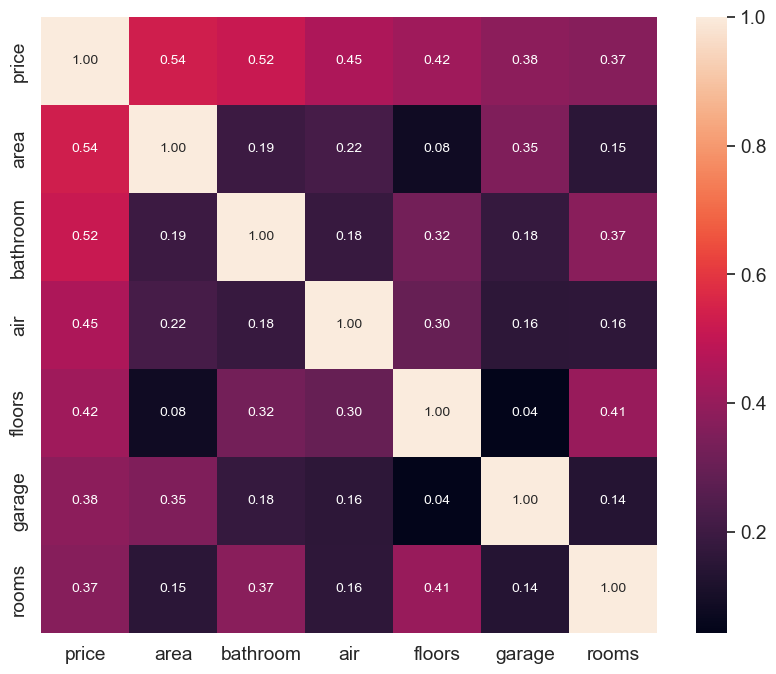

In [704]:
# 02. correlation check
corrmat = house.corr()
# print (corrmat)
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house[cols].values.T)
f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#correlation value is not greater than 0.75 in top 5 correlated independent variables, so we cannot drop any columns.

In [705]:
# 03. Outlier removal
house_df.describe(percentiles = [0.01, 0.05, 0.1, 0.2,0.25, 0.3, 0.4, 0.5, 0.6,0.67, 0.7,0.75,0.74, 0.77, 0.8, 0.9,0.95, 0.99])

,price,area,rooms,bathroom,floors,cellar,air,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.349817,0.316850,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.477349,0.465675,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1%,26725.000000,1972.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5%,35000.000000,2565.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,40500.000000,3000.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
20%,47000.000000,3450.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
30%,51500.000000,3670.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [706]:
# house_df.describe?

In [707]:
house

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [708]:
min_threshold, max_threshold = house_df['price'].quantile([0.01, 0.99])
min_threshold, max_threshold

(26725.0, 150499.99999999953)

In [709]:
house_df[house_df['price'] < min_threshold]

,price,area,rooms,bathroom,floors,cellar,air,garage
55,25000,3620,2,1,1,0,0,0
56,25245,2400,3,1,1,0,0,0
138,26500,2990,2,1,1,0,0,1
162,25000,2910,3,1,1,0,0,0
232,25000,3850,3,1,2,0,0,0
238,26000,3000,2,1,1,1,0,2


In [710]:
house_df[house_df['price'] > max_threshold]

,price,area,rooms,bathroom,floors,cellar,air,garage
92,163000,7420,4,1,2,1,1,2
331,175000,8960,4,4,4,0,1,3
337,155000,7500,3,3,1,1,1,2
362,175000,9960,3,2,2,1,0,2
377,190000,7420,4,2,3,0,1,2
418,174500,7500,4,2,2,1,1,3


In [711]:
house_df = house_df[(house_df['price'] > min_threshold) & (house_df['price'] < max_threshold)]
house_df

,price,area,rooms,bathroom,floors,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,0,1,0
542,94000,6000,3,2,4,0,1,0
543,103000,6000,3,2,4,0,1,1
544,105000,6000,3,2,2,0,1,1


In [712]:
house_df.sample(10)

,price,area,rooms,bathroom,floors,cellar,air,garage
481,95000,5700,3,1,1,1,1,2
8,83800,4800,3,1,1,1,0,0
455,75000,3800,3,1,2,1,0,1
135,90000,6000,4,2,4,0,0,1
394,72000,6600,3,1,1,1,0,0
39,54500,3150,2,2,1,1,0,0
287,62000,6450,4,1,2,0,0,0
102,125000,4320,3,1,2,1,0,2
126,117000,5960,3,3,2,1,0,1
495,59000,5985,3,1,1,1,0,0


# Feature Scaling - Standardization

In [713]:
from sklearn import preprocessing

house_df_S = preprocessing.scale(house_df)
house_df_S = pd.DataFrame(house_df_S)
house_df_S

,0,1,2,3,4,5,6,7
0,-1.052413,0.329870,0.050889,-0.572887,0.220556,1.367833,-0.677507,0.382563
1,-1.197243,-0.529096,-1.307841,-0.572887,-0.934120,-0.731083,-0.677507,-0.798296
2,-0.742063,-0.965544,0.050889,-0.572887,-0.934120,-0.731083,-0.677507,-0.798296
3,-0.286882,0.701315,0.050889,-0.572887,0.220556,-0.731083,-0.677507,-0.798296
4,-0.266192,0.566666,-1.307841,-0.572887,-0.934120,-0.731083,-0.677507,-0.798296
...,...,...,...,...,...,...,...,...
529,0.995900,-0.157651,0.050889,1.494150,2.529909,-0.731083,1.475998,-0.798296
530,1.099350,0.399516,0.050889,1.494150,2.529909,-0.731083,1.475998,-0.798296
531,1.471770,0.399516,0.050889,1.494150,2.529909,-0.731083,1.475998,0.382563
532,1.554530,0.399516,0.050889,1.494150,0.220556,-0.731083,1.475998,0.382563


# Linear regression from sklearn library 

In [714]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [715]:
X = house_df_S.iloc[:, 1:]
Y = house_df_S.iloc[:, :1]
# print(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
X_train.head()

,1,2,3,4,5,6,7
404,0.585239,0.050889,-0.572887,-0.934120,1.367833,1.475998,0.382563
518,0.399516,0.050889,-0.572887,2.529909,-0.731083,1.475998,1.563421
290,-0.937685,0.050889,-0.572887,0.220556,-0.731083,-0.677507,0.382563
269,0.538808,0.050889,-0.572887,-0.934120,-0.731083,1.475998,1.563421
114,-0.529096,0.050889,1.494150,0.220556,1.367833,1.475998,0.382563


In [716]:
lm = LinearRegression() #LinearRegression object
lm.fit(X_train, Y_train) # Building the model
# print(lm.coef_)
coef = pd.DataFrame(lm.coef_, index = ['coefficients'])
coef

,0,1,2,3,4,5,6
coefficients,0.338389,0.034362,0.259003,0.28777,0.188146,0.239647,0.159381


# Linear Regression modeling using statsmodel

In [717]:
import statsmodels.api as sm

In [718]:
X_exog = sm.add_constant(X_train)
# sm.add_constant?
res = sm.OLS(Y_train, X_exog)
res.fit()
# Y_train
# X_exog

In [719]:
# sm.OLS?

In [720]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           2.13e-91
Time:                        23:52:23   Log-Likelihood:                -385.44
No. Observations:                 427   AIC:                             786.9
Df Residuals:                     419   BIC:                             819.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.029      0.313      0.754      -0.048       0.067
1              0.3384      0.032     10.507      0.000       0.275       0.402
2              0.0344      0.033      1.045      0.297      -0.030       0.099
3              0.2590      0.033      7.842      0.000       0.194       0.324
4              0.2878      0.034      8.383      0.000       0.220       0.355
5              0.1881      0.031      6.120      0.000       0.128       0.249
6              0.2396      0.031      7.710      0.000       0.179       0.301
7              0.1594      0.032      5.013      0.000       0.097       0.222
==============================================================================
Omnibus:                       19.292   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.941
Skew:                           0.401   Prob(JB):                     3.84e-06
Kurtosis:                       3.870   Cond. No.                         2.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""